In [1]:
# Project: Tensorflow Classification
# Input: Lending Club Data
# Output: Default or not

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read input data

# description
data_info = pd.read_csv('./data/lending_club_info.csv', index_col='LoanStatNew')

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

# loans
df = pd.read_csv('./data/lending_club_loan_two.csv')

In [3]:
# this function prints the description from lending_club-info to get a description of the columns
feat_info('installment')

# dti = A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
# initial_list_status = The initial listing status of the loan. Possible values are – W, F
# mort_acc = Number of mortgage accounts.
# initial_list_status = The initial listing status of the loan. Possible values are – W, F
# installment = The monthly payment owed by the borrower if the loan originates.

The monthly payment owed by the borrower if the loan originates.


In [4]:
# understand input data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [5]:
# df['emp_length'].isna().sum()
# understand input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

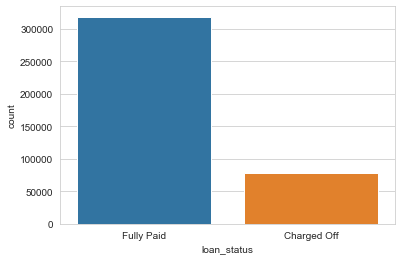

In [6]:
# Visualize theoretical output
sns.set_style('whitegrid')

# check output data- who survived? 
sns.countplot(x='loan_status',data=df)

# here the data is not 50/50 but is reasonable considering most folks do not default

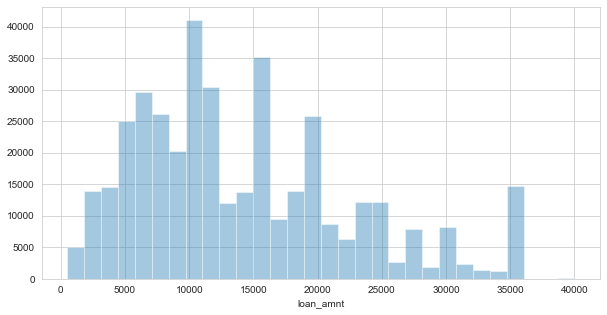

In [7]:
# visualize the size of the loan amounts
plt.figure(figsize=(10,5))
sns.distplot(df['loan_amnt'].dropna(), kde=False, bins=30)

# notice the spikes at 10k, 15k, 20k which is reasonable considering standard loan sizes

In [8]:
# Look at correlation between variables
# Correlation Analysis (Among the variables)
df.drop('loan_status', axis=1).corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10, 0)

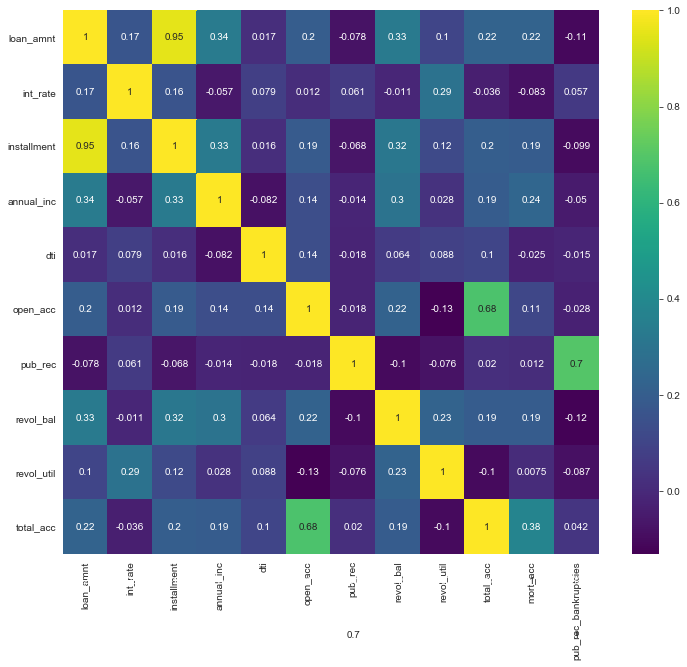

In [9]:
# Correlation Visualizaton
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap='viridis')
plt.ylim(10,0)


# notice loan amount and installment have almost perfect correlation

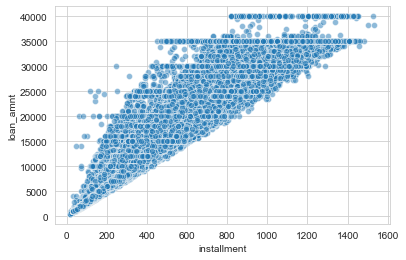

In [10]:
# next question: how correlated is installment vs loan amount?
sns.scatterplot(x='installment',y='loan_amnt', data=df, alpha=0.5)

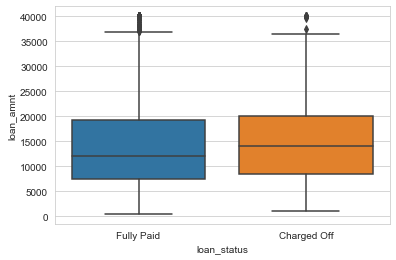

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [11]:
# next question: are there certain loan sizes more prone to default?
# Boxplot showing relationship between loan status and loan amount
sns.boxplot(x=df['loan_status'], y=df['loan_amnt'])
plt.show()

# Create summary statistics for the loan amount, grouped by loan status
df.groupby('loan_status')['loan_amnt'].describe()   # df['loan_amnt'].groupby(by=df['loan_status']).describe()

# looks like if average loan amount is slightly higher then there is a chance of loan default (harder to pay back large loans)

In [12]:
# look at credit ratings for unique
df['grade'].unique()
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

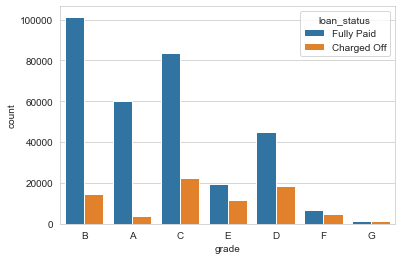

In [13]:
# bar chart of counts by grade
sns.countplot(x='grade',data=df,hue='loan_status')

# looks like charge off increases as it gets higher

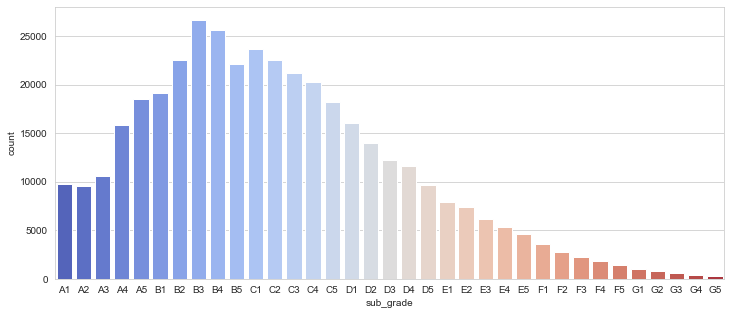

In [14]:
plt.figure(figsize=(12,5))
# create an order array for seaborn countplot
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=sub_grade_order, palette='coolwarm')

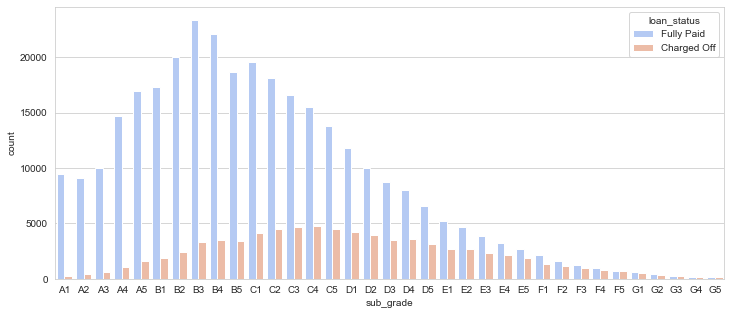

In [15]:
plt.figure(figsize=(12,5))
# create an order array for seaborn countplot
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=sub_grade_order, palette='coolwarm',hue='loan_status')

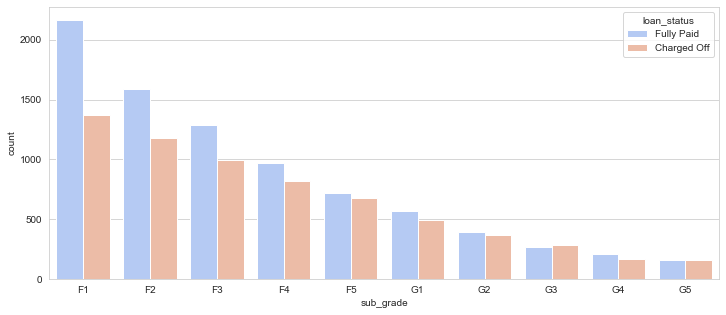

In [16]:
# zoom in on F and G
plt.figure(figsize=(12,5))

df2 = df[(df['grade']=='F') | (df['grade']=='G')]
sub_grade_order = sorted(df2['sub_grade'].unique())

# create an order array for seaborn countplot
sns.countplot(x='sub_grade',data=df2, order=sub_grade_order, palette='coolwarm',hue='loan_status')

# Data Exploration and Cleanup - how do they relate to output?

In [17]:
# To Visualize the Correlation Between Label and Features
# Modify Target Output from Text to 0 and 1
# Loan Status text to 0/1 Integer

# df['loan_status'].value_counts()
# df['year'] = df['date'].apply(lambda date: date.year)
df['loan_repaid'] = df['loan_status'].apply(lambda status: status=='Fully Paid')
df['loan_repaid'] = df['loan_status'].apply(lambda x : 1 if (x == 'Fully Paid') else 0)
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

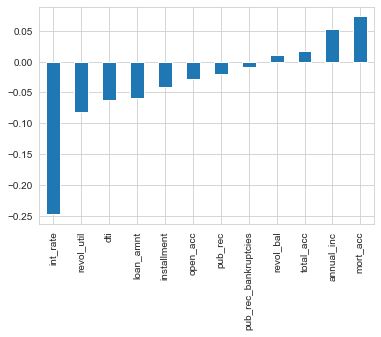

In [18]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [19]:
# visualize nulls
# need to remove missing data or fill missing data
# remove any unnecessary or repetitive features
# convert categorical string features to dummy variables
df.head()
print('Length of dataframe =', len(df))

Length of dataframe = 396030


In [20]:
# Missing Data Analysis
# Number of missing:
df.isnull().sum()
# Percentage missing:
df.isnull().sum()/len(df)*100

pd.DataFrame([df.isnull().sum(), (df.isnull().sum()/len(df)*100) ], index=['Number of Null','Percent Null (%)']).transpose()

,Number of Null,Percent Null (%)
loan_amnt,0.0,0.000000
term,0.0,0.000000
int_rate,0.0,0.000000
installment,0.0,0.000000
grade,0.0,0.000000
sub_grade,0.0,0.000000
emp_title,22927.0,5.789208
emp_length,18301.0,4.621115
home_ownership,0.0,0.000000
annual_inc,0.0,0.000000


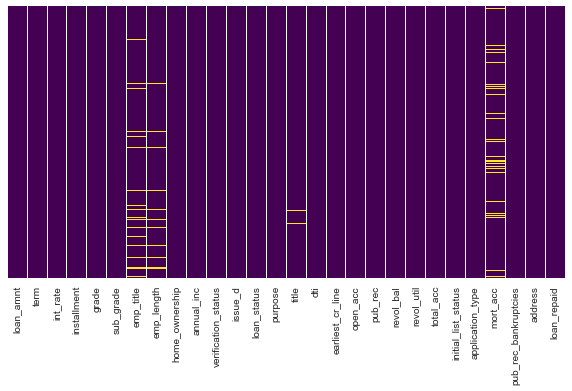

In [21]:
# Missing Data Analysis
# Null heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
# looks like there are 396030 entries
# and a number of them have null
"""
emp_title               373103 non-null object
emp_length              377729 non-null object
title                   394275 non-null object
revol_util              395754 non-null float64
mort_acc                358235 non-null float64
pub_rec_bankruptcies    395495 non-null float64
"""

# are we going to drop it or fill it with something? 
# depends if it is interesting or not
df['emp_title'].nunique() # 173000 unique employment titles
df['emp_title'].value_counts() 
# future: could map to high income job or low income jobs
# for now: just drop it

Teacher                                           4389
Manager                                           4250
Registered Nurse                                  1856
RN                                                1846
Supervisor                                        1830
                                                  ... 
GO NISSAN 104TH                                      1
Regulatory Advisor                                   1
CBS Studios, Inc                                     1
General Dynamics Armament & Technical Products       1
GIS Support Specialist                               1
Name: emp_title, Length: 173105, dtype: int64

In [23]:
# Drop emp_title
df = df.drop('emp_title', axis = 1)

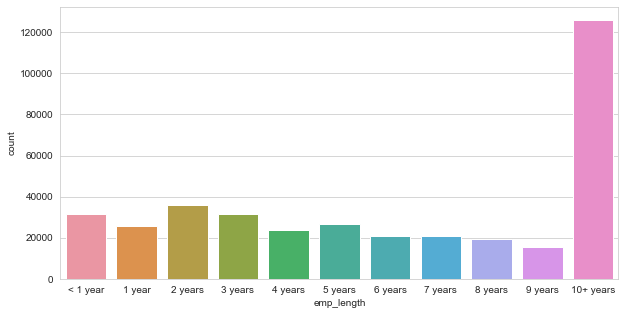

In [24]:
# Next one: emp_length
# get a list of unique values and then plot them by count, plot will be ordered

df['emp_length'].value_counts()
# df['emp_length'].isna().sum() # 18301
"""
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
NaN 18301
"""

# run this to get a list:
sorted(df['emp_length'].dropna().unique())
# ['1 year','10+ years','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','< 1 year']

# we run the above and take above output list and paste it here, and then we re-order it manually:
emp_length_order = ['< 1 year', '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years']

# count plot seaborn
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', data=df, order=emp_length_order) # looks like most borrowers have been working a long time

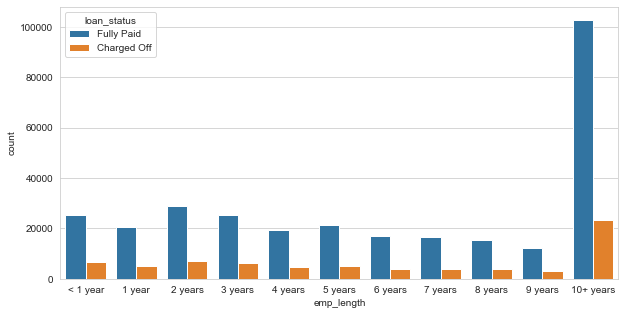

In [25]:
# redo above chart with hue to differentiate folks who default
plt.figure(figsize=(10,5))
emp_length_order = ['< 1 year', '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years']
sns.countplot(x='emp_length', data=df, hue='loan_status', order=emp_length_order)

# chart does not say much - do ratio analysis

In [26]:
# ratio analysis
# want to build percent of people per category

# first filter on loan_status, then groupby emp_length, then count to get each number of the columns (above chart)

df[df['loan_status']=='Charged Off'].groupby('emp_length').count()
df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,20728,20728,20728,20728,20728,20728,20728,20728,20728,20728,...,20728,20728,20712,20728,20728,20728,18126,20666,20728,20728
10+ years,102826,102826,102826,102826,102826,102826,102826,102826,102826,102826,...,102826,102826,102766,102826,102826,102826,95511,102753,102826,102826
2 years,28903,28903,28903,28903,28903,28903,28903,28903,28903,28903,...,28903,28903,28886,28903,28903,28903,25355,28848,28903,28903
3 years,25483,25483,25483,25483,25483,25483,25483,25483,25483,25483,...,25483,25483,25468,25483,25483,25483,22220,25437,25483,25483
4 years,19344,19344,19344,19344,19344,19344,19344,19344,19344,19344,...,19344,19344,19333,19344,19344,19344,16526,19321,19344,19344
5 years,21403,21403,21403,21403,21403,21403,21403,21403,21403,21403,...,21403,21403,21391,21403,21403,21403,18691,21381,21403,21403
6 years,16898,16898,16898,16898,16898,16898,16898,16898,16898,16898,...,16898,16898,16884,16898,16898,16898,15002,16878,16898,16898
7 years,16764,16764,16764,16764,16764,16764,16764,16764,16764,16764,...,16764,16764,16747,16764,16764,16764,15284,16751,16764,16764
8 years,15339,15339,15339,15339,15339,15339,15339,15339,15339,15339,...,15339,15339,15327,15339,15339,15339,14142,15323,15339,15339


,Charged Off,Fully Paid,Charged Off Percent
emp_length,,,
1 year,5154.0,20728.0,0.199135
10+ years,23215.0,102826.0,0.184186
2 years,6924.0,28903.0,0.193262
3 years,6182.0,25483.0,0.195231
4 years,4608.0,19344.0,0.192385
5 years,5092.0,21403.0,0.192187
6 years,3943.0,16898.0,0.189194
7 years,4055.0,16764.0,0.194774
8 years,3829.0,15339.0,0.199760


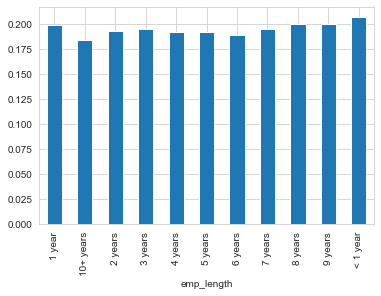

In [27]:
# first filter on loan_status, then groupby emp_length, then count to get each number of the columns (above chart)
# second grab column loan_status
emp_charged_off = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_fully_paid = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_ratio = emp_charged_off/(emp_charged_off+emp_fully_paid) # note this is percent of total rather than A:B it is A / (A+B)
emp_ratio_df = pd.DataFrame([emp_charged_off, emp_fully_paid, emp_ratio],
                          index=['Charged Off', 'Fully Paid', 'Charged Off Percent']
                         )

# here is the previous calculation
def emp_length_extraction(term_text):
    if term_text == '0':
        return 0
    else:
        temp_num = term_text.split()[0]
        if temp_num == '<':
            return 6
        elif temp_num == '10+':
            return 120
        else:
            return int(temp_num)*12
# df['emp_length'].fillna(value='0', inplace=True)    
# df['emp_length_values'] = df['emp_length'].apply(emp_length_extraction)
# df['emp_length_values'].value_counts()

emp_ratio.transpose().plot(kind='bar') 
emp_ratio_df.transpose()
# looks like 20% regardless of emp_length, so not useful info, so do not keep the feature

In [28]:
# drop the feature
df.drop(['emp_length'], axis=1, inplace=True)

In [29]:
# looked at title vs purpose (same info)
df = df.drop('title', axis=1)

# FILLING MISSING DATA

In [30]:
# mort_acc has 10% missing data

# so, what do we do with this column?
# if you dropna then you drop 10% of data - is not very good
# if you drop the feature then you have to be careful not to lose good info...

# so if we fill with value, what is a reasonable way to fill in the data? look for other features are highly correlated

df.corr()['mort_acc'].sort_values()
# looks like a positive correlation with "total_acc" feature

# next step: 
# use the average of mortgage accounts per total accounts to fill in the missing data

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [31]:
# so first analyze total account information
df.groupby('total_acc').mean()

# take this total account info and focus on number of mortgage accounts
df.groupby('total_acc').mean()['mort_acc']

# this will be the lookup table used to fill in mort_acc:

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [32]:
# fill in mort_acc missing values with a mapping table you created above
missing_data_map_total_acc = df.groupby('total_acc').mean()['mort_acc']
# how to use the mapping table:
missing_data_map_total_acc[2.0] # returns 0.0 like the above

# this is a helper function that checks if NaN, if it is then return the mapping table output, otherwise return mort_acc #
def fill_mort_acc(total_acc, mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return missing_data_map_total_acc[total_acc] # this maps to the table above
    else:
        return mort_acc

# this executes the filling function which uses the mapping table function, axis=1 because column
# helpful: https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']), axis=1)

In [33]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [34]:
# 2 more nulls to investigate

# i use fillna=0 but solutions use dropna because small number of rows
"""
df['revol_util'].fillna(value=0,inplace=True)
df['mort_acc'].fillna(value=0,inplace=True)
df['pub_rec_bankruptcies'].fillna(value=0,inplace=True)
"""
# drop empty values for 'revol_util' and 'pub_rec_bankruptcies' 
# do not need to drop the feature but just drop the rows that have NaN
df = df.dropna()

# my own model: 
# drop all the other columns
# df.drop(['home_ownership','address','emp_title','title','purpose', 'earliest_cr_line','initial_list_status'], axis=1, inplace=True)

In [35]:
# should be all zero now
df.isnull().sum()  # df.isna().sum() might work too but isnull seems more comprehensive

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Categorical Data and String Data

In [36]:
# First step: determine which features are not values
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [37]:
# term
# remove months text and convert to integer 36 and 60
# method 1 = create manual mapping table
# method 2 = grab 2 characters
df['term'].value_counts()
"""
36 months
60 months
"""

def month_extraction(term_text):
    return int(term_text.split()[0])

# another way = df['term'] = df['term'].apply(lambda term: int(term[:3]))
df['term'] = df['term'].apply(month_extraction)

# run this to check if did it properly:
# df['term'].value_counts()

In [38]:
# grade
# grade already covered by sub_grade so drop it
df = df.drop('grade', axis=1)


In [39]:
# sub_grade (first run - not used but example code here anyway)
# convert sub_grade to dummy variables using a mapping function
# this might be wrong because not really a continous variable?

# sub grade might be better than grade
df['sub_grade'].value_counts()
"""
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
"""

# my way (not used in second run): 
def grade_extraction(term_text):
    grade_letter = term_text[0]
    if grade_letter == 'A':
        return int(term_text[1])
    elif grade_letter == 'B':
        return 10 + int(term_text[1])
    elif grade_letter == 'C':
        return 20 + int(term_text[1])
    elif grade_letter == 'D':
        return 30 + int(term_text[1])
    elif grade_letter == 'E':
        return 40 + int(term_text[1])
    elif grade_letter == 'F':
        return 50 + int(term_text[1])
    else:
        return 60 + int(term_text[1])
    
df['sub_grade_values'] = df['sub_grade'].apply(grade_extraction)

# drop columns because not used in second run:
df.drop(['sub_grade_values'], axis=1, inplace=True)

In [40]:
# sub_grade (second run)
# convert to dummy variables using one hot encoding

# use pandas dummy variables to add new columns to original dataframe, drop original sub_grade column 
# and add drop_first - do not need to duplicate information
# A/B/C --> _/1/0 because A is implicitly encoded
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

# REMOVE the sub_grade column THEN concat to original dataframe
df = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

In [41]:
# more dummy variables:
# verification_status, appliction_type, initial_list_status, purpose
# mass create dummy variables since low unique values

df['purpose'].value_counts() # only 15 unique values -> 15 unique columns

# use pandas dummy variables to add new columns to original dataframe, drop original column 
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)

# REMOVE the sub_grade column THEN concat to original dataframe
df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1), 
                dummies], axis=1)

In [42]:
# home_ownership
# we want to replace (NONE and ANY) into OTHER
# or custom replace function or mapping function

df['home_ownership'].value_counts()
"""
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
"""

# we want to replace (NONE and ANY) into OTHER
# or custom replace function or mapping function
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

df['home_ownership'].value_counts()

# use pandas dummy variables to add new columns to original dataframe, drop original column 
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

# REMOVE the sub_grade column THEN concat to original dataframe
df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)

# See what columns we got
# df.columns

In [43]:
# Address
# Extract the zip code

df['zip_code'] = df['address'].apply(lambda address:address[-5:])
df['zip_code'].value_counts() # luckily we only have 20 here

# use pandas dummy variables to add new columns to original dataframe, drop original column 
dummies = pd.get_dummies(df['zip_code'], drop_first=True)

# REMOVE the sub_grade column THEN concat to original dataframe
df = pd.concat([df.drop('zip_code', axis=1), dummies], axis=1)

df = df.drop('address', axis=1)

In [44]:
# issue_d
# does this feature help to show which will default?
# course thinks this is data leakage - but maybe in reality vintage matters

# date conversion (if needed)
df['issue_d'].value_counts()
df['issue_d'] = pd.to_datetime(df['issue_d'])
# date is not useful by itself, so extract year
df['issue_d'] = df['issue_d'].apply(lambda date: date.year) # df['issue_d'].apply(lambda date: date.month)

# will stick to course workbook:
df.drop(['issue_d'], axis=1, inplace=True)


In [45]:
# earliest_cr_line
# does this feature help to show which will default?
# this is a historical time stamp feature - extract the year
# no need to convert to dummy variable because year can be treated as a continuous data type

# date conversion (if needed)
df['earliest_cr_line'].value_counts()
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
# date is not useful by itself, so extract year
# df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:])) # last 4 letters approach
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: date.year) # df['issue_d'].apply(lambda date: date.month)

# df['earliest_cr_line'].value_counts()
# len(df['earliest_cr_line']) # 396030

# DATA Cleaned - Now DATA PREPROCESSING (TRAIN/TEST/SPLIT)

In [46]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',


In [47]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [48]:
# Remove old text output since we already have loan_repaid as 0/1
df = df.drop('loan_status', axis=1)

In [49]:
# Train Test Split
# df = df.sample(frac=0.1,random_state=101) # if many entries, can sample 10% of the rows for speed/memory issues
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

# create two numpy arrays from pd dataframes
from sklearn.model_selection import train_test_split
# train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) # 20% will be test set

# normalize the data and fit the scaler
from sklearn.preprocessing import MinMaxScaler

# create instance of scaler
scaler = MinMaxScaler()
# only fit to the training set (to avoid data leakage)
scaler.fit(X_train)
# overwrite the X_train and X_test with the scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# Tensorflow Model for Classification
# THIRD MODEL (callback with dropout) - see other models (Model 1=no callback, Model 2 = with callback no dropout)
# runs a little bit more than the Model 2 because of the randomly stopped updating neurons
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Can use this to check: # X_train.shape[1] is number of features, in this case = 30
print('X_train shape: ', X_train.shape) # (316175 rows, 78 columns representing the features) 

X_train shape:  (316175, 78)


In [51]:
first_layer_neurons = X_train.shape[1]

# Build Neural Network
model = Sequential()

# Layer 1 - recommended to use number of features
# model.add(Dense(78, activation='relu', input_shape=(78,)))
model.add(Dense(first_layer_neurons, activation='relu', input_shape=(first_layer_neurons,))) # relu = rectified linear unit y = max(0, x)
model.add(Dropout(0.2)) 
# % Neurons Randomly Dropped Each time = means 0.2*100=20 neurons will not have weights or biases updated. 
# Ex) Dropout = 1 drops 100% of neurons, if dropout = 0 then drops 0% of neurons

# Layer 2 - reduce half
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2)) 

# Layer 3 - reduce half
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2)) 

# Final Layer - Binary classification model so output must be binary: use sigmoid
model.add(Dense(units=1, activation='sigmoid')) # output is 0 or 1

# Binary classification model
model.compile(loss='binary_crossentropy', optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 78)                6162      
_________________________________________________________________
dropout (Dropout)            (None, 78)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 39)                3081      
_________________________________________________________________
dropout_1 (Dropout)          (None, 39)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 19)                760       
_________________________________________________________________
dropout_2 (Dropout)          (None, 19)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2

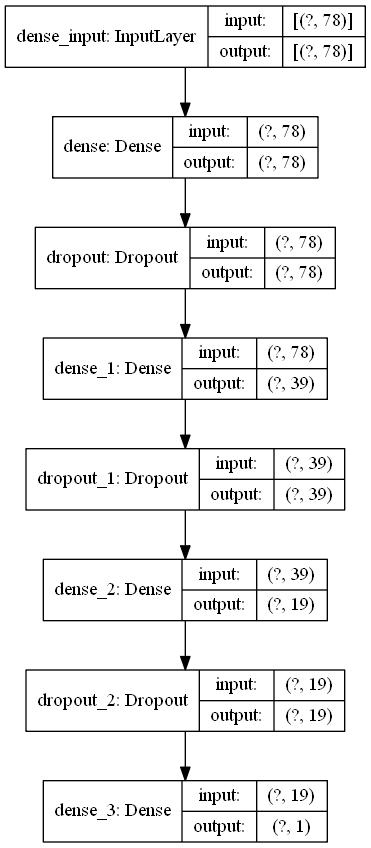

In [52]:
# see the model: print the string summary of the network 
model.summary()

# another way to visualize the model
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

# this graphic requires the first layer to have input_shape: model.add(Dense(19, activation='relu', input_shape=(19,)))

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
# min = stop when quantity monitored has stopped decreasing (minimize validation loss)
# max = stop when quantity monitored has stopped increasing (maximize accuracy)
# patience = how many epochs to wait before stopping despite hitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Now we fit the model to 600 epochs to demonstrate the overfitting
# Also included the validation data
# model.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test,y_test), callbacks=[early_stop])

# course used epochs=30
model.fit(x=X_train, y=y_train, epochs=50,batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=[early_stop]
         )



Train on 316175 samples, validate on 79044 samples
Epoch 1/50
316175/316175 [==============================] - 18s 56us/sample - loss: 0.2984 - val_loss: 0.2644
Epoch 2/50
316175/316175 [==============================] - 16s 50us/sample - loss: 0.2655 - val_loss: 0.2627
Epoch 3/50
316175/316175 [==============================] - 16s 51us/sample - loss: 0.2626 - val_loss: 0.2624
Epoch 4/50
316175/316175 [==============================] - 16s 51us/sample - loss: 0.2620 - val_loss: 0.2619
Epoch 5/50
316175/316175 [==============================] - 15s 49us/sample - loss: 0.2610 - val_loss: 0.2616
Epoch 6/50
316175/316175 [==============================] - 16s 52us/sample - loss: 0.2602 - val_loss: 0.2615
Epoch 7/50
316175/316175 [==============================] - 14s 43us/sample - loss: 0.2600 - val_loss: 0.2613
Epoch 8/50
316175/316175 [==============================] - 13s 41us/sample - loss: 0.2593 - val_loss: 0.2617
Epoch 9/50
316175/316175 [==============================] - 16s 51us/

# EVALUATE MODEL PERFORMANCE AND SAVE/LOAD MODEL

Text(0.5, 1.0, 'Model Loss - Validation vs Training - with Early Stop')

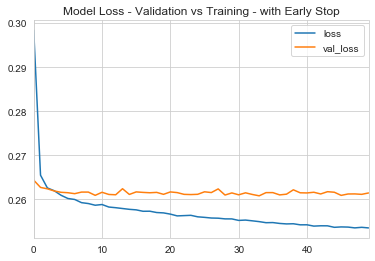

In [54]:
# Evaluate Model Performance - Plot Validation Loss vs Training Loss
# look for flattening of errors - glad to see the early stop did its job
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title('Model Loss - Validation vs Training - with Early Stop')


In [55]:
# performance for classification problems
from sklearn.metrics import classification_report, confusion_matrix

# create predictions based on model 
# predictions = model.predict(X_test)
predictions = model.predict_classes(X_test)

# compare predictions to actuals
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

# https://en.wikipedia.org/wiki/Precision_and_recall
# Precision = Accuracy of Positive Values = TP / (TP + FP)
# Recall = Accuracy overall = TP / all

# Accuracy is how much you got right
# Do not forget that most of the data was re-paid (imbalanced data set to begin with)

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 6929  8729]
 [  166 63220]]


In [56]:
# Imbalanced Dataset assessment 
# Re Assess y_test or the true data
df['loan_repaid'].value_counts() # 317696 Repaid and 77523 not repaid
317696 / len(df)   # notice that 80% of my points were already repaid itself based on test data set, so 80% should be baseline

# hence 90% accuracy is not necessarily good because baseline is 80%. We need more context.
# so TRUE NOTIFICATION use F1 score of 0.6 as your metric to improve
# ways to improve:
    # 1) add layers
    # 2) add more neurons
    # 3) try other algorithms
    # 4) add more epochs

0.8038479931379817

In [57]:
# use model to make a prediction on a single person

# select random existing person
import random
random.seed(101)
random_int = random.randint(0,len(df))
new_customer = df.drop('loan_repaid',axis=1).iloc[random_int]

# this is a pandas series
new_customer

# model requires it in a numpy array:
new_customer.values.reshape(1,78)

# recall, the model requires scaled input data
new_customer = scaler.transform(new_customer.values.reshape(1,78))
new_customer

array([[0.61538462, 1.        , 0.50331126, 0.40836493, 0.00708257,
        0.0030113 , 0.75362319, 0.2       , 0.        , 0.01593446,
        0.07340581, 0.29530201, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.  

In [58]:
# prediction using model # predictions = model.predict_classes(X_test)
predictions = model.predict_classes(new_customer)
predictions

array([[1]])

In [59]:
# so did we get it right?
# pull the new_customer without the drop: new_customer = df.drop('loan_repaid',axis=1).iloc[random_int]
new_customer_orig = df.iloc[random_int]
new_customer_orig['loan_repaid']

1.0

In [60]:
# how to save the model down after all this work
from tensorflow.keras.models import load_model
model.save('my_TF_lending_club_model1.h5')

In [62]:
# how to load the model
later_model = load_model('my_TF_lending_club_model1.h5')
later_model.predict(new_customer)

array([[0.581259]], dtype=float32)

# TENSORBOARD

In [72]:
# Tensorboard
# https://www.tensorflow.org/tensorboard/get_started
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

# Unique log for each time you run the model
from datetime import datetime
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M-%S")
timestamp

'2020-04-27--1607-04'

In [69]:
# double backslash? yes
pwd

'C:\\A\\Projects\\Python\\Python - matplotlib_VC'

In [73]:
# Log folder
# Windows: use "logs\\fit"
# MacOS/Linux: use "logs\fit"
import os
print('Current Directory: ', os.getcwd())
log_directory = 'logs\\fit'
log_directory = log_directory + '\\' + timestamp
log_directory

Current Directory:  C:\A\Projects\Python\Python - matplotlib_VC


'logs\\fit\\2020-04-27--1607-04'

In [74]:
board = TensorBoard(log_dir=log_directory, # where stuff saved
                   histogram_freq=1,       # after freq=1, so each epoch, get weights, weights and histogram
                   write_graph=True,
                   write_images=True,
                   update_freq='epoch',
                   profile_batch=2,
                   embeddings_freq=1)



first_layer_neurons = X_train.shape[1]
# Build Neural Network
model2 = Sequential()
# Layer 1 - recommended to use number of features
# model.add(Dense(78, activation='relu', input_shape=(78,)))
model2.add(Dense(first_layer_neurons, activation='relu', input_shape=(first_layer_neurons,))) # relu = rectified linear unit y = max(0, x)
model2.add(Dropout(0.2)) 
# % Neurons Randomly Dropped Each time = means 0.2*100=20 neurons will not have weights or biases updated. 
# Ex) Dropout = 1 drops 100% of neurons, if dropout = 0 then drops 0% of neurons
# Layer 2 - reduce half
model2.add(Dense(39, activation='relu'))
model2.add(Dropout(0.2)) 
# Layer 3 - reduce half
model2.add(Dense(19, activation='relu'))
model2.add(Dropout(0.2)) 
# Final Layer - Binary classification model so output must be binary: use sigmoid
model2.add(Dense(units=1, activation='sigmoid')) # output is 0 or 1
# Binary classification model
model2.compile(loss='binary_crossentropy', optimizer='adam')


In [75]:
# add "board" to callbacks=[early_stop, board]

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# course used epochs=30
model2.fit(x=X_train, y=y_train, epochs=50,batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=[early_stop, board]
         )

Train on 316175 samples, validate on 79044 samples
Epoch 1/50
316175/316175 [==============================] - 11s 35us/sample - loss: 0.2967 - val_loss: 0.2650
Epoch 2/50
316175/316175 [==============================] - 10s 32us/sample - loss: 0.2653 - val_loss: 0.2633
Epoch 3/50
316175/316175 [==============================] - 11s 36us/sample - loss: 0.2630 - val_loss: 0.2628
Epoch 4/50
316175/316175 [==============================] - 15s 48us/sample - loss: 0.2618 - val_loss: 0.2620
Epoch 5/50
316175/316175 [==============================] - 17s 55us/sample - loss: 0.2608 - val_loss: 0.2621
Epoch 6/50
316175/316175 [==============================] - 22s 70us/sample - loss: 0.2604 - val_loss: 0.2619
Epoch 7/50
316175/316175 [==============================] - 16s 52us/sample - loss: 0.2598 - val_loss: 0.2621
Epoch 8/50
316175/316175 [==============================] - 14s 45us/sample - loss: 0.2596 - val_loss: 0.2620
Epoch 9/50
316175/316175 [==============================] - 18s 56us/

In [78]:
# run tensorboard visualization
# open http://localhost:6006/

# Two important pieces: 1) where did you save the log files and 2) where are you located
print(log_directory)

logs\fit\2020-04-27--1607-04


In [ ]:
# then run command line in anaconda prompt

# conda activate [env]
# cd to the folder
# then: "tensorboard --logdir logs\fit"
# C:\A\Projects\Python\Python - matplotlib_VC>         tensorboard --logdir\logs\fit\2020-04-27--1607-04

# now go back to http://localhost:6006/